# Major Project:Used Car Price Prediction

### Problem Statement: Predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.
#### Size of training set: 6,019 records 
#### Size of test set: 1,234 records
#### Features:

* **Name**: The brand and model of the car.
* **Location**: The location in which the car is being sold or is available for purchase.
* **Year**: The year or edition of the model.
* **Kilometers_Driven**: The total kilometres driven in the car by the previous owner(s) in KM.
* **Fuel_Type**: The type of fuel used by the car.
* **Transmission**: The type of transmission used by the car.
* **Owner_Type**: Whether the ownership is Firsthand, Second hand or other.
* **Mileage**: The standard mileage offered by the car company in kmpl or km/kg
* **Engine**: The displacement volume of the engine in cc.
* **Power**: The maximum power of the engine in bhp.
* **Seats**: The number of seats in the car.
* **Price**: The price of the used car in INR Lakhs.

### Done By:Vijeth PH,Sparsh Hurkat,Sakshi Tayal,Namratha Yeturi,Ishan Karmakar,Kaushal Phulgirkar(KPP),Jasmine Kalra,Gokul Praveen.

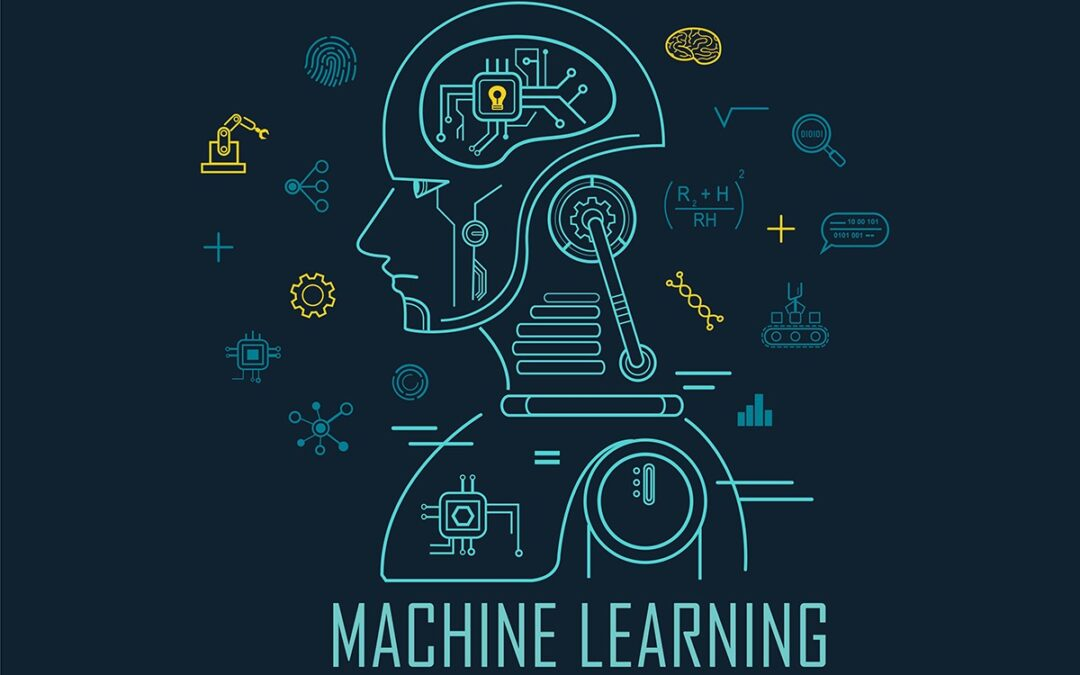

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import collections
import warnings
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,accuracy_score,f1_score
from sklearn.metrics import r2_score
from statistics import mean
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
%matplotlib inline

In [2]:
# reading the data
!pip3 install xlrd
traindata=pd.read_excel("Data_Train.xlsx")
testdata=pd.read_excel("Data_Test.xlsx")

print('Basic details of training data:')
display(traindata.info())

print('Basic details of test data:')
display(testdata.info())

'pip3' is not recognized as an internal or external command,
operable program or batch file.


Basic details of training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


None

Basic details of test data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


None

In these two datasets,

Numerical Variables are: Year, Kilometers_Driven, Seats and Price

Categorical Variables are: Name, Location, Fuel_Type, Transmission, Owner_type, Mileage, Engine, and Power.

-------------------------------------------------------
### More information about Training dataset

In [3]:
# more information about training dataset
print('First five rows of training dataset:')
display(traindata.head())
print('(Rows,Columns) = ',traindata.shape)
print('Description of training dataset:')
display(traindata.describe())

#checking the number of features in the training Dataset
print("Number of features in the training dataset :")
print("Training Dataset : ", len(traindata.columns),':',list(traindata.columns))

First five rows of training dataset:


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


(Rows,Columns) =  (6019, 12)
Description of training dataset:


,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


Number of features in the training dataset :
Training Dataset :  12 : ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


In [4]:
# more details for training dataset:
print('null values for training dataset:')
display(traindata.isnull().sum())
print('unique values for training dataset:')
traindata.nunique()

null values for training dataset:


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

unique values for training dataset:


Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

---------------------------------------------------
### More information about test dataset:

In [5]:
# more information about test dataset
print('First five rows of test dataset:')
display(testdata.head())
print('(Rows,Columns) = ',testdata.shape)
print('Description of test dataset:')
display(testdata.describe())

#checking the number of features in the test Dataset
print("Number of features in the test dataset :")
print("Test Dataset : ", len(testdata.columns),':',list(testdata.columns))

First five rows of test dataset:


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


(Rows,Columns) =  (1234, 11)
Description of test dataset:


,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


Number of features in the test dataset :
Test Dataset :  11 : ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']


In [6]:
print('null values for test dataset:')
display(testdata.isnull().sum())
print('unique values for test dataset:')
testdata.nunique()

null values for test dataset:


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

unique values for test dataset:


Name                 768
Location              11
Year                  20
Kilometers_Driven    755
Fuel_Type              4
Transmission           2
Owner_Type             4
Mileage              301
Engine               104
Power                249
Seats                  7
dtype: int64

### Data Preprocessing

In [7]:
# Drop the NA Values from Training Data
traindata.dropna(inplace=True)
traindata.reset_index(inplace=True)

# Considering data in Name column to do further modifications
traindata['Name'][:5]

0              Maruti Wagon R LXI CNG
1    Hyundai Creta 1.6 CRDi SX Option
2                        Honda Jazz V
3                   Maruti Ertiga VDI
4     Audi A4 New 2.0 TDI Multitronic
Name: Name, dtype: object

**It is seen that the names are starting with Brand names and then the Model name followed by some of its specifications. So data cleaning is done so that Brand and Model name of cars can be stored in a separate column.**

In [8]:
# Spliting "Name" Feature to 'Brand', 'CarName' and 'Model'.
def splitName(x):
    x['Brand'] = x['Name'].apply(lambda x: x.split(' ')[0].strip())
    x['CarName'] = x['Name'].apply(lambda x: x.split(' ')[1].strip())
    x['Model'] = x['Name'].apply(lambda x:' '.join(x.split(' ')[2:]))
    x.drop(['Name'],axis=1, inplace=True)

**It is also seen that the features 'Mileage', 'Engine' and 'Power' have additional metrics(kmpl. CC, bhp etc.,) that make them objects instead of being numeric data. So, those metrics should be removed from these features to convert them into numeric data.**

**Another observation is that, there are some null object values which were not removed, like 'null', 'null bhp' and '0.0 kmpl' in features 'Power' and 'Mileage'. These should also be replaced with NA.**

In [9]:
# Splitting the features Power, Engine, & Mileage to remove Units.    
def splitIn(x):
    x['Power'].replace('null',np.nan,inplace=True)
    x['Power'].replace('null bhp',np.nan,inplace=True)
    x['Mileage'].replace('0.0 kmpl',np.nan,inplace=True)
    for i in ['Power', 'Engine', 'Mileage']:      
        x[i] = x[i].apply(lambda x: float(x.split()[0].strip()) if not pd.isna(x) else x)

In [10]:
# Imputing Power, Engine, Seats & Mileage by grouping.
def imputeNaN(x):
    for i in ['Power', 'Engine', 'Seats','Mileage']:
        x[i] = x.groupby(['Model'])[i].transform(lambda y: y.fillna(y.mean()))
        # Some Values will still be left with na.
        x[i].fillna(x[i].mean(), inplace=True)

In [11]:
# preprocessing datasets to modify the features
def preprocessData(data):
    splitName(data)
    splitIn(data)
    imputeNaN(data)
    
preprocessData(traindata)
preprocessData(testdata)

print('updated training dataset:')
display(traindata.head())
print('updated test dataset:')
display(testdata.head())

updated training dataset:


,index,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,CarName,Model
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,V
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic


updated test dataset:


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,CarName,Model
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.200000,4.0,Maruti,Alto,K10 LXI CNG
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.300000,5.0,Maruti,Alto,800 2016-2019 LXI
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.800000,7.0,Toyota,Innova,Crysta Touring Sport 2.4 MT
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.350179,5.0,Toyota,Etios,Liva GD
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.850000,5.0,Hyundai,i20,Magna


### Outlier Detection

Text(0.5, 1.0, 'Power')

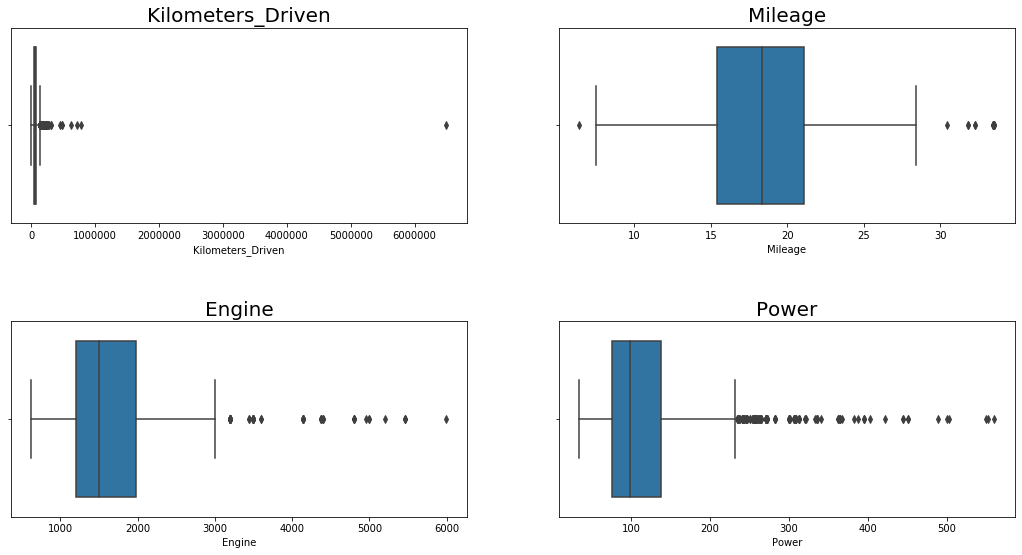

In [12]:
# finding outliers in the newly formed numeric data
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,9))
plt.subplots_adjust(hspace=0.5)
km_driven=sns.boxplot(x=traindata['Kilometers_Driven'],ax=axes[0][0])
km_driven.set_title("Kilometers_Driven",fontsize=20)
milge=sns.boxplot(x=traindata['Mileage'],ax=axes[0][1])
milge.set_title("Mileage",fontsize=20)
eng=sns.boxplot(x=traindata['Engine'],ax=axes[1][0])
eng.set_title("Engine",fontsize=20)
powr=sns.boxplot(x=traindata['Power'],ax=axes[1][1])
powr.set_title("Power",fontsize=20)

In [13]:
# getting rid of outliers by quantile filtering
def filterByQuantiles(x):
    for i in ['Kilometers_Driven', 'Mileage', 'Power', 'Engine']:
        upper_lim = x[i].quantile(.98)
        lower_lim = x[i].quantile(.02)
        return x[(x[i] < upper_lim) & (x[i] > lower_lim)]
    
traindata=filterByQuantiles(traindata)

Text(0.5, 1.0, 'Power')

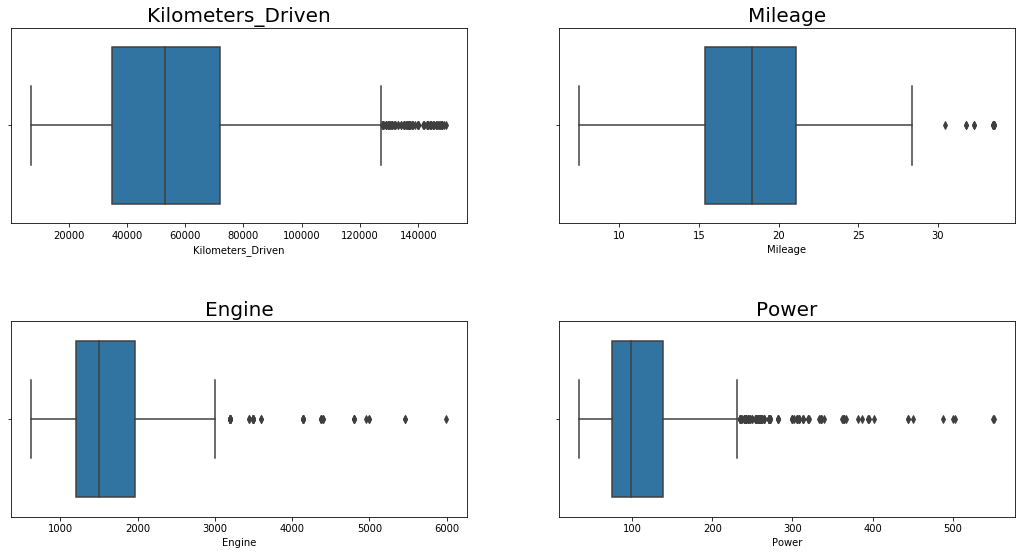

In [14]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,9))
plt.subplots_adjust(hspace=0.5)
km_driven=sns.boxplot(x=traindata['Kilometers_Driven'],ax=axes[0][0])
km_driven.set_title("Kilometers_Driven",fontsize=20)
milge=sns.boxplot(x=traindata['Mileage'],ax=axes[0][1])
milge.set_title("Mileage",fontsize=20)
eng=sns.boxplot(x=traindata['Engine'],ax=axes[1][0])
eng.set_title("Engine",fontsize=20)
powr=sns.boxplot(x=traindata['Power'],ax=axes[1][1])
powr.set_title("Power",fontsize=20)

### Data Visualization

Text(0.5, 1.0, 'Top Brands')

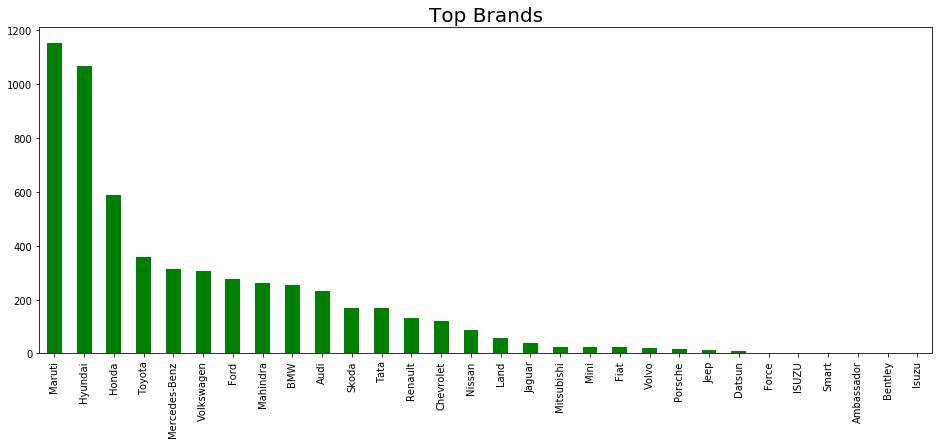

In [15]:
# A look at the top brands
plt.figure(figsize=(16,6))
pd.value_counts(traindata['Brand']).plot.bar(color='g')
plt.title("Top Brands",fontsize=20)

**Maruti, Hyundai, Honda and Toyota are the brands having highest number of used car sales**

Text(0.5, 1.0, 'Most cars sold locations')

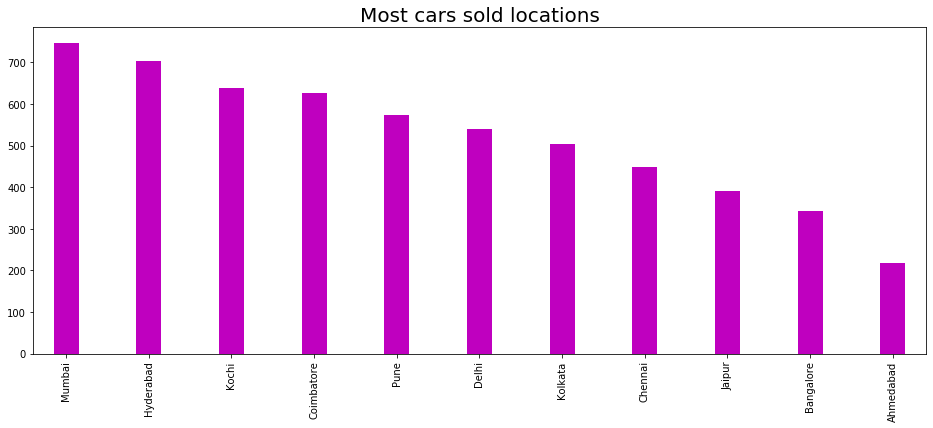

In [16]:
# A look at the location of cars
plt.figure(figsize=(16,6))
pd.value_counts(traindata['Location']).plot.bar(color='m', width=0.3)
plt.title("Most cars sold locations",fontsize=20)

**Most of the used cars are being sold in Mumbai, Hyderabad and Kochi**

Text(0.5, 1.0, 'Fuel Type of used cars')

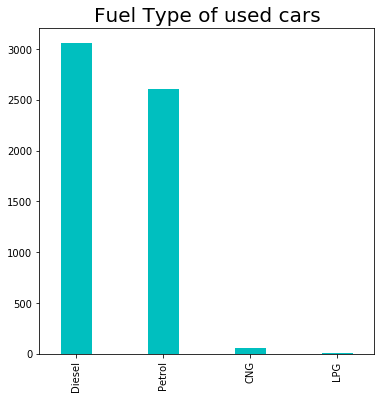

In [17]:
# A look at the fuel type
plt.figure(figsize=(6,6))
pd.value_counts(traindata['Fuel_Type']).plot.bar(color='c', width = 0.35)
plt.title("Fuel Type of used cars",fontsize=20)

**Most of the used cars sold work on Diesel and Petrol as their fuel.**

Text(0.5, 1.0, 'Transmission of used cars')

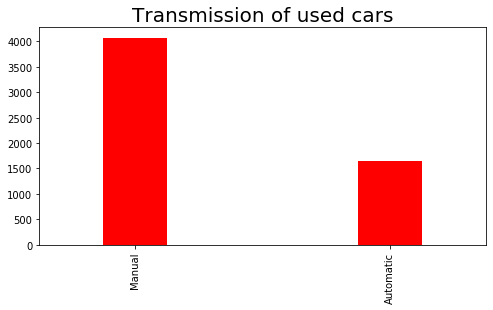

In [18]:
# A look at the transmission
plt.figure(figsize=(8,4))
pd.value_counts(traindata['Transmission']).plot.bar(color='r', width = 0.25)
plt.title("Transmission of used cars",fontsize=20)

**Most of the used cars have Manual transmission.**

Text(0.5, 1.0, 'Owner Type of used cars')

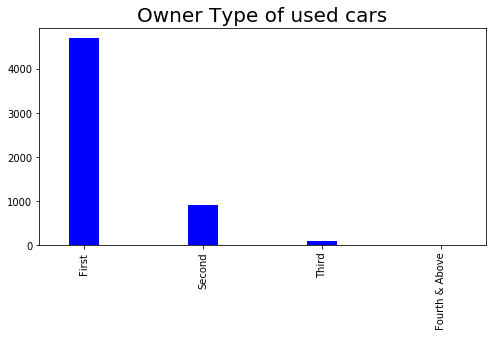

In [19]:
# A look at the owner type
plt.figure(figsize=(8,4))
pd.value_counts(traindata['Owner_Type']).plot.bar(color='b', width = 0.25)
plt.title("Owner Type of used cars",fontsize=20)

**Most of the cars sold are first hand cars, passed by only one owner.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DF938DA08>,
      dtype=object)

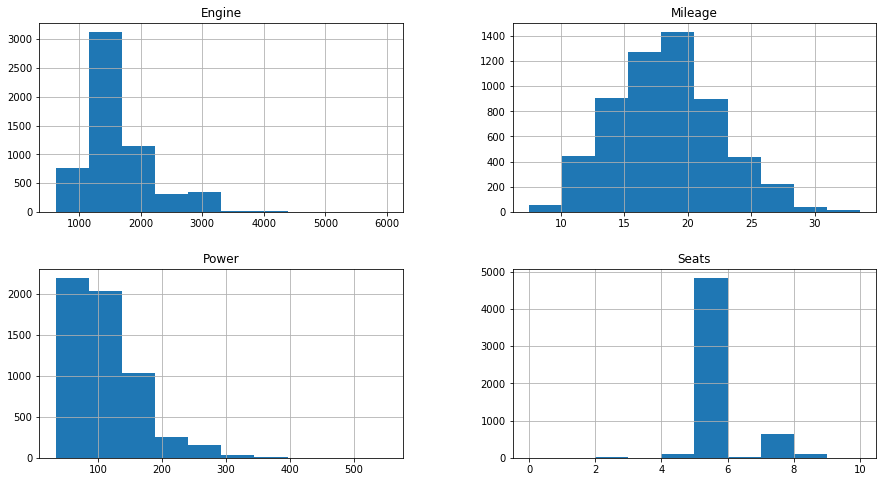

In [20]:
# Univariate visualisation for quantitative features
features = ['Mileage', 'Engine','Power','Seats']
traindata[features].hist(figsize=(15, 8))

**Observations:**
* Most of the used cars have Engine Displacement of around 1500 CC.
* Most of the used cars have Mileage varying between 15-20 kmpl.
* Most of the used cars have Power output varying between 40-120 bhp.
* Most of the used cars have 5-6 Seats.

Text(0.5, 1.0, 'Location and Mileage')

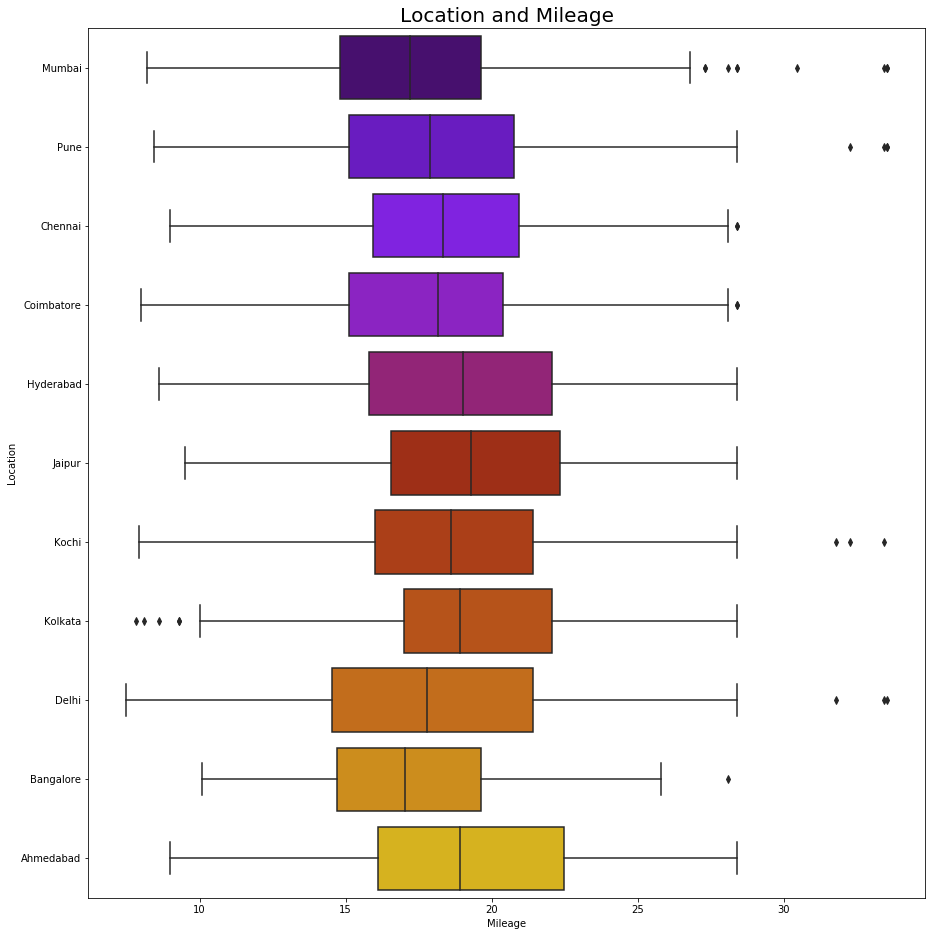

In [21]:
#multivariate visualisation for 2 variables Location and mileage
plt.figure(figsize=(15,16))
sns.boxplot(y = 'Location', x = 'Mileage', data = traindata,palette='gnuplot') 
plt.title("Location and Mileage",fontsize=20)

Text(0.5, 1.0, 'Fuel Type and Power')

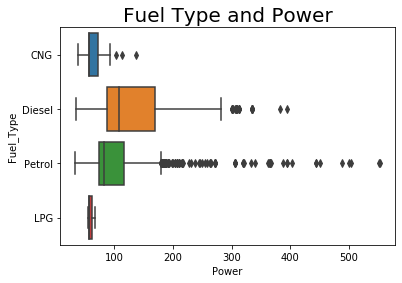

In [22]:
sns.boxplot(y = 'Fuel_Type', x = 'Power', data = traindata) 
plt.title("Fuel Type and Power",fontsize=20)

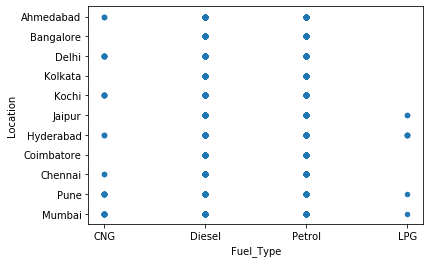

In [23]:
traindata.plot.scatter('Fuel_Type',"Location")

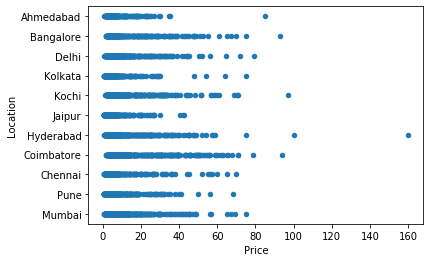

In [24]:
traindata.plot.scatter('Price','Location')



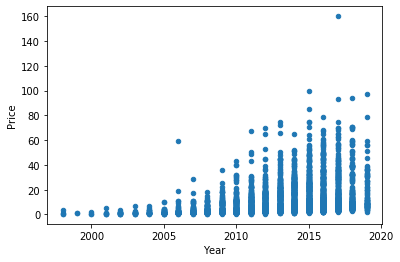

In [25]:
traindata.plot.scatter('Year','Price')

Text(0.5, 1.0, 'Transmission and Mileage')

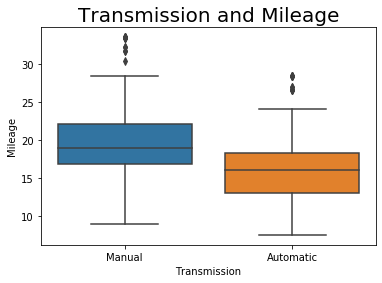

In [26]:
sns.boxplot(x = 'Transmission', y = 'Mileage', data = traindata)
plt.title("Transmission and Mileage",fontsize=20)

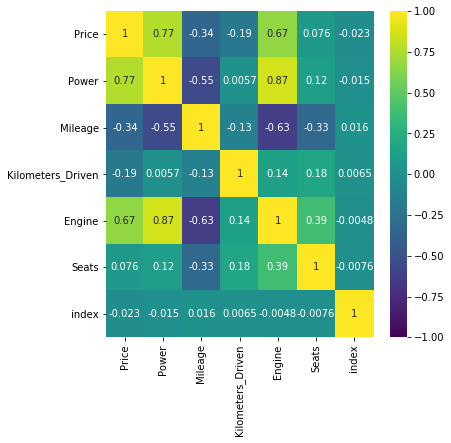

In [27]:
# correlation matrix for numerical variables
# Drop non-numerical variables
numerical = list(set(traindata.columns) - 
                 set(['Location', 'Year', 'Fuel_Type', 
                      'Transmission', 'Owner_Type', 'Brand','Model']))

# Calculate and plot with annotated correlation
corr_matrix = traindata[numerical].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, vmin=-1,cmap='viridis',annot=True)

**There is a strong correlation between Power, Price and Engine of used cars.**

In [28]:
# Contingency table : also called a cross tabulation.
# It shows a multivariate frequency distribution of categorical variables in tabular form. 
pd.crosstab(traindata['Brand'], traindata['Transmission']).T

Brand,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
Transmission,,,,,,,,,,,,,,,,,,,,,
Automatic,0,233,253,1,9,0,0,0,36,125,...,6,12,17,17,92,1,8,93,57,19
Manual,1,0,0,0,110,10,23,3,242,464,...,18,76,1,116,77,0,161,266,251,1


In [29]:
# just a backup of train data and test data for future uses
trainbackup=traindata.copy()
testbackup=testdata.copy()

### Encoding Categorical Values

In [30]:
# Label encoding: owner type
traindata['Owner_Type'].replace(['First', 'Second', 'Fourth & Above', 'Third'],[0,1,3,2],inplace=True)
testdata['Owner_Type'].replace(['First', 'Second', 'Fourth & Above', 'Third'],[0,1,3,2],inplace=True)

In [31]:
# Creating a Flag Column in both datasets
traindata['train'] =1
testdata['train']  =0
combined = pd.concat([traindata,testdata])

In [32]:
# Reducing number of Categorical Values
def changeBrandLabel(x):
    for col in ['Brand', 'Model','CarName']:
        threshold = 20 if col=='Model' else 60
        counts = x[col].value_counts()
        mask = x[col].isin(counts[counts > threshold].index)
        x.loc[~mask, col] = "Other"

changeBrandLabel(combined)

In [33]:
# Dummy encoding of categorical values
df = pd.get_dummies(data = combined,columns = ['Brand','Model','Location','Fuel_Type', 'Transmission','CarName'],
                    drop_first = True)
print('New Columns:',df.shape[1])

New Columns: 112


In [34]:
# remove Flag column placed earlier
traindata = df[df['train'] == 1]
traindata.drop(['train'], axis=1, inplace=True)

testdata = df[df['train'] == 0]
testdata.drop(['train','Price'], axis=1, inplace=True)

print('Updated (Rows,Columns) of training data: ',traindata.shape)
print('Updated (Rows,Columns) of test data: ',testdata.shape)

Updated (Rows,Columns) of training data:  (5729, 111)
Updated (Rows,Columns) of test data:  (1234, 110)


D:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Scaling and Modelling

In [35]:
# Dependent Variable
Y_train_data = traindata.loc[:,['Price']].values
Y_train_data = np.log1p(traindata.Price)

# Independent Variables of Training Dataset
X_train_data = traindata.loc[:,traindata.columns != 'Price']

# Independent Variables of Test Dataset
X_test = testdata.iloc[:,:].values

In [36]:
# Scale the data to achieve accurate training results.
scaler = StandardScaler()
X_train_data.loc[:,"Mileage":"Power"]=scaler.fit_transform(X_train_data.loc[:,"Mileage":"Power"])


D:\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [37]:
# train test split
X_train, X_val, Y_train, Y_val = train_test_split(X_train_data, Y_train_data, test_size = 0.30, random_state = 1)

### Feature Importance:

In [39]:
Model=GradientBoostingRegressor(n_estimators=500, max_depth = 5, min_samples_split= 2,
          learning_rate=0.01, loss='ls')
Model=Model.fit(X_train.loc[:,"Year":"Seats"],Y_train)



 This graph below gives us an insight on the importance of each feature on the price of used cars


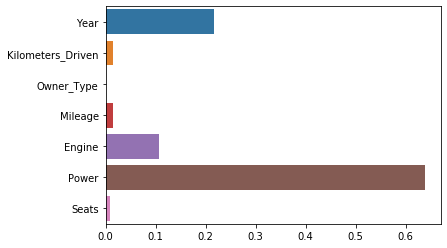

In [40]:
featureimportance=pd.Series(Model.feature_importances_,index=X_train[["Year","Kilometers_Driven","Owner_Type","Mileage","Engine","Power","Seats"]].columns)

print("\n This graph below gives us an insight on the importance of each feature on the price of used cars")
sns.barplot(x=featureimportance.values,y=featureimportance.index,label="Feature Importance")


### Model Training and Model Evaluation - 1st method - XGBRegressor

In [41]:
# imported required libraries prior
my_model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=4, min_child_weight=2, n_jobs=4)
my_model.fit(X_train, Y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_val, Y_val)], 
             verbose=False)
Y_pred = my_model.predict(X_val)

[15:50:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [42]:
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

# Eliminating negative values in prediction for score calculation
for i in range(len(Y_pred)):
     if Y_pred[i] < 0:
        Y_pred[i] = 0
        
y_true = Y_val

In [43]:
print("XGB Regressor Score: ",score(Y_pred,y_true))
print("Mean Absolute Error:",mean_absolute_error(y_true, Y_pred))
print("Mean Squared Error: " + str(mean_squared_error(y_true, Y_pred)))
print("Mean Squared Log Error: " + str(mean_squared_log_error(np.exp(y_true), np.exp(Y_pred))))
print('R2 Score: ',r2_score(y_true, Y_pred))
print("Cross Validation Score:",mean(cross_val_score(my_model, X_train, Y_train, cv=5)))

XGB Regressor Score:  0.978024637914468
Mean Absolute Error: 0.10692121772937506
Mean Squared Error: 0.02446444650120281
Mean Squared Log Error: 0.019835667055519056
R2 Score:  0.9541844820509537
[15:50:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:50:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:50:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:50:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:50:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation Score: 0.9501180685519809


(-2.509703767523334, 83.87030626557784)

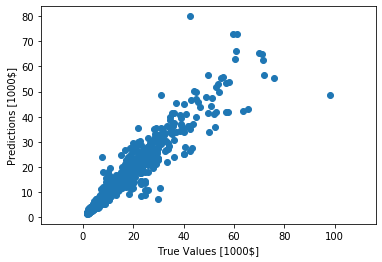

In [44]:
# True Values vs Predictions for 1st Method
plt.scatter(np.exp(y_true), np.exp(Y_pred))
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

### Model Training and Model Evaluation - 2nd method - Linear Regression

In [45]:
LR=LinearRegression()
model=LR.fit(X_train,Y_train)
Y_predict=model.predict(X_val)


In [46]:
print("Mean Squared Error:",mean_squared_error(y_true,Y_predict))
print("Mean Absolute Error:",mean_absolute_error(y_true,Y_predict))
print("R2 Score:",r2_score(y_true,Y_predict))

Mean Squared Error: 0.03728875456576094
Mean Absolute Error: 0.13576114703375586
R2 Score: 0.930167902878113


<b>Scatter Plot:

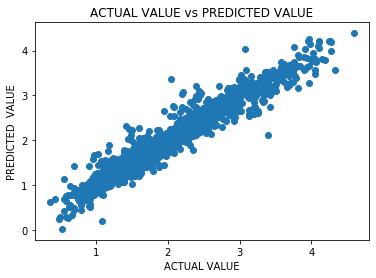

In [47]:
plt.scatter(y_true,Y_predict)
plt.title("ACTUAL VALUE vs PREDICTED VALUE")
plt.xlabel("ACTUAL VALUE")
plt.ylabel("PREDICTED  VALUE")
plt.plot()
plt.show()

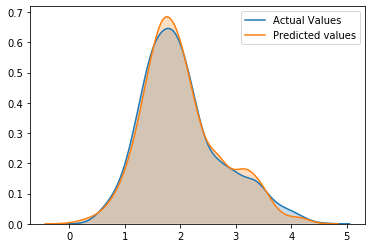

In [48]:
sns.kdeplot(y_true,shade=True,label="Actual Values")
sns.kdeplot(Y_predict,shade=True,label="Predicted values")

Text(0, 0.5, 'Predictions')

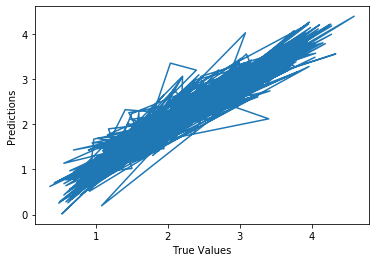

In [49]:
plt.plot(y_true,Y_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')

### Model Training and Model Evaluation - 3rd method - RandomForestRegressor

### Model Training on Full Train Set

In [50]:
# imported required libraries prior
X_train,X_val,y_train,y_val = train_test_split(X_train_data,Y_train_data,test_size=0.2,random_state = 1994)
clf=RandomForestRegressor(n_estimators=300)
clf.fit(X_train,y_train)
Y_pred=clf.predict(X_val)
print('Random Forest Regressor Score: ',clf.score(X_val,y_val))
print('Mean Absolute Error: ',str(mean_absolute_error(Y_pred, y_val)))
print("Mean Squared Error: " + str(mean_squared_error(Y_pred, y_val)))
print("Mean Squared Log Error: " + str(mean_squared_log_error(np.exp(Y_pred), np.exp(y_val))))
print('R2 Score: ',r2_score(y_val, Y_pred))

Random Forest Regressor Score:  0.9555880318074929
Mean Absolute Error:  0.113846446488296
Mean Squared Error: 0.025053296521637528
Mean Squared Log Error: 0.019741536443934605
R2 Score:  0.9555880318074929


(-1.7492665797651867, 71.81449591088226)

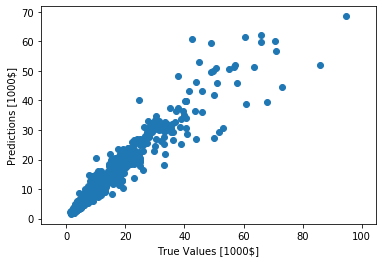

In [51]:
# True Values vs Predictions for 2nd Method
plt.scatter(np.exp(y_val), np.exp(Y_pred))
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

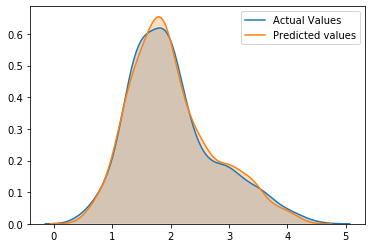

In [52]:
sns.kdeplot(y_val,shade=True,label="Actual Values")
sns.kdeplot(Y_pred,shade=True,label="Predicted values")

Text(0, 0.5, 'Predictions')

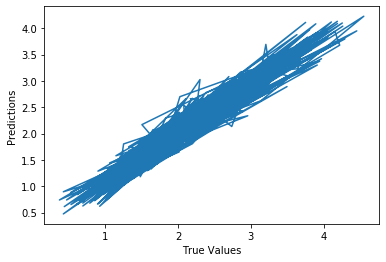

In [53]:
plt.plot(y_val,Y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

### Model Training and Model Evaluation - 4th method - GradientBoostingRegressor

In [54]:
# imported required libraries prior
GBoost = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05,
                                   max_depth=4,
                                   min_samples_leaf=15, min_samples_split=15, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train, y_train)
gb_train_pred = GBoost.predict(X_val)
print('Gradient Boost Regressor Score: ',GBoost.score(X_val,y_val))
print('Mean Absolute Error: ',str(mean_absolute_error(gb_train_pred, y_val)))
print("Mean Squared Error: " + str(mean_squared_error(gb_train_pred, y_val)))
print("Mean Squared Log Error: " + str(mean_squared_log_error(np.exp(gb_train_pred), np.exp(y_val))))
print('R2 Score: ',r2_score(y_val, gb_train_pred))

Gradient Boost Regressor Score:  0.9539705151269097
Mean Absolute Error:  0.115539041846016
Mean Squared Error: 0.025965756083251416
Mean Squared Log Error: 0.020685506003587036
R2 Score:  0.9539705151269097


(-1.7688501712869347, 69.56886396090603)

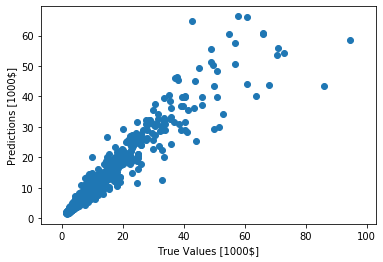

In [55]:
# True Values vs Predictions for 3rd Method
plt.scatter(np.exp(y_val), np.exp(gb_train_pred))
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

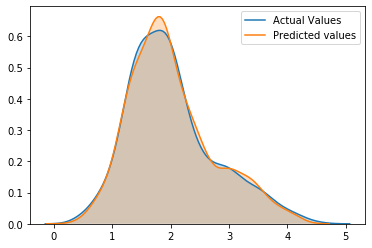

In [56]:
sns.kdeplot(y_val,shade=True,label="Actual Values")
sns.kdeplot(gb_train_pred,shade=True,label="Predicted values")

Text(0, 0.5, 'Predictions')

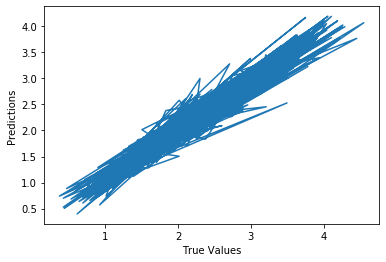

In [57]:
plt.plot(y_val,gb_train_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

### Model Training and Model Evaluation - 5th method - LightGBMRegressor

In [58]:
# imported required libraries prior
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=35,
                              learning_rate=0.052, n_estimators=2800,feature_fraction = 0.75,
                              feature_fraction_seed=9,min_data_in_leaf =15)
model_lgb.fit(X_train, y_train)
lgb_train_pred = model_lgb.predict(X_val)
print('LightGBM Regressor Score: ',model_lgb.score(X_val,y_val))
print('Mean Absolute Error: ',str(mean_absolute_error(lgb_train_pred, y_val)))
print("Mean Squared Error: " + str(mean_squared_error(lgb_train_pred, y_val)))
print("Mean Squared Log Error: " + str(mean_squared_log_error(np.exp(lgb_train_pred), np.exp(y_val))))
print('R2 Score: ',r2_score(y_val, lgb_train_pred))

LightGBM Regressor Score:  0.9662374430344515
Mean Absolute Error:  0.10039081999347363
Mean Squared Error: 0.01904584249272859
Mean Squared Log Error: 0.01485358889336816
R2 Score:  0.9662374430344516


(-2.820790225459323, 89.80891943190993)

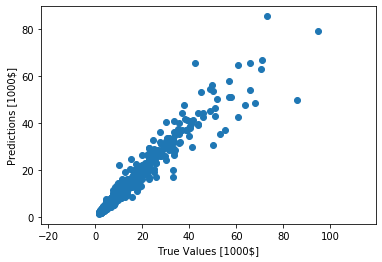

In [59]:
# True Values vs Predictions for 4th Method
plt.scatter(np.exp(y_val), np.exp(lgb_train_pred))
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

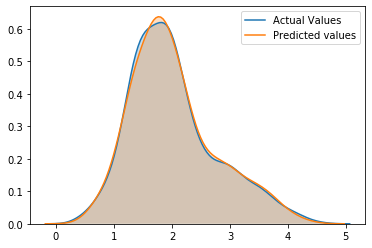

In [60]:
sns.kdeplot(y_val,shade=True,label="Actual Values")
sns.kdeplot(lgb_train_pred,shade=True,label="Predicted values")

Text(0, 0.5, 'Predictions')

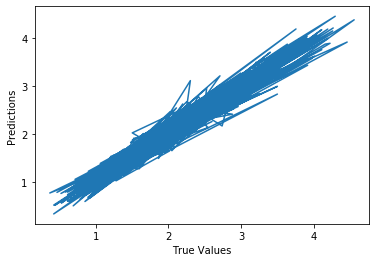

In [61]:
plt.plot(y_val,lgb_train_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

#### XGB Regressor was finally selected for price predictions.

### Predicting the Results and Saving Prediction Results

In [62]:
# Predicting the target(Price) for predictors in the test data
Y_pred2 = my_model.predict(testdata)

# converting target to original state
Y_pred2 = np.exp(Y_pred2)-1 

Y_pred2 = Y_pred2.round(2)
# Eliminating negative values in prediction for score calculation
for i in range(len(Y_pred2)):
    if Y_pred2[i] < 0:
        Y_pred2[i] = 0

In [63]:
pd.DataFrame(Y_pred2, columns = ['Price']).to_excel("predictions.xlsx", index=False)